In [31]:
bs = 2
num_epochs = 100
learning_rate = 1e-3
mom = 0.9
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [2]:
import torchvision
import torchvision.transforms as tfms
import torch.utils.data as data
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
import scipy as sc
import os
import seaborn as sns
import PIL
import PIL.Image as Image

In [6]:
import warnings
import nibabel as nib

In [59]:
root_dir = 'C:/python_data/input/MCI_preprocessed/1year'
data_dir = 'C:/python_data/input/roi_nii'

In [41]:
class Dataloader_img(data.Dataset):
    def __init__(self,root_dir,seg_dir,transforms):
        self.root_dir = root_dir
        self.seg_dir = seg_dir
        self.transforms = transforms
        self.files = os.listdir(self.root_dir)
        self.lables = os.listdir(self.seg_dir)
        print(self.files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self,idx):
        img_name = self.files[idx]
        label_name = self.lables[idx]
        img = nib.load(os.path.join(self.root_dir,img_name))
            
        #change to numpy
        img = np.array(img.dataobj)
        #change to PIL
        img = Image.fromarray(img.astype('uint8'), 'RGB')
        print(img.size)
        label = nib.load(os.path.join(self.seg_dir,label_name))
        #change to numpy
        label = np.array(label.dataobj)
        #change to PIL
        label = Image.fromarray(label.astype('uint8'), 'RGB')
        print(label.size)
        if self.transforms:
            img = self.transforms(img)
            label = self.transforms(label)
            return img,label
        else:
            return img, label

In [51]:
full_dataset = Dataloader_img(root_dir,data_dir,tfms.Compose([tfms.RandomRotation(180),tfms.ToTensor()]))

['s10wADNI_MCI_FDG_003_S_1057_00month.nii', 's10wADNI_MCI_FDG_003_S_1074_00month.nii', 's10wADNI_MCI_FDG_003_S_1122_00month.nii', 's10wADNI_MCI_FDG_005_S_0222_00month.nii', 's10wADNI_MCI_FDG_005_S_0546_00month.nii', 's10wADNI_MCI_FDG_005_S_1224_00month.nii', 's10wADNI_MCI_FDG_006_S_0675_00month.nii', 's10wADNI_MCI_FDG_006_S_1130_00month.nii', 's10wADNI_MCI_FDG_007_S_0101_00month.nii', 's10wADNI_MCI_FDG_007_S_0128_00month.nii', 's10wADNI_MCI_FDG_007_S_0293_00month.nii', 's10wADNI_MCI_FDG_007_S_0344_00month.nii', 's10wADNI_MCI_FDG_007_S_0414_00month.nii', 's10wADNI_MCI_FDG_007_S_0698_00month.nii', 's10wADNI_MCI_FDG_010_S_0161_00month.nii', 's10wADNI_MCI_FDG_010_S_0422_00month.nii', 's10wADNI_MCI_FDG_010_S_0904_00month.nii', 's10wADNI_MCI_FDG_011_S_0326_00month.nii', 's10wADNI_MCI_FDG_011_S_0362_00month.nii', 's10wADNI_MCI_FDG_011_S_0861_00month.nii', 's10wADNI_MCI_FDG_011_S_1282_00month.nii', 's10wADNI_MCI_FDG_012_S_0634_00month.nii', 's10wADNI_MCI_FDG_012_S_0932_00month.nii', 's10wADNI_

In [52]:
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])
train_loader = data.DataLoader(train_dataset,shuffle=False,batch_size=bs)
val_loader = data.DataLoader(val_dataset,shuffle=False,batch_size=bs)

(109, 91)
(109, 91)
torch.Size([91, 109])


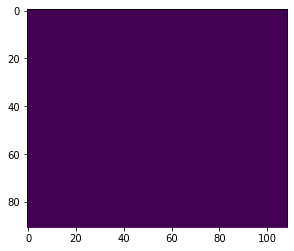

In [53]:
test_img, test_lb = next(iter(full_dataset))
print(test_img[1].shape)
plt.imshow(test_img[0])
plt.show()

In [63]:
root_dir = 'C:/python_data/input/roi_nii'
data_dir = 'C:/python_data/input/roi_nii'

In [64]:
full_dataset = Dataloader_img(root_dir,data_dir,tfms.Compose([tfms.RandomRotation(180),tfms.ToTensor()]))

['001_Olfactory_R_018.nii', '002_Rectus_R_024.nii', '003_OFClat_R_032.nii', '004_OFCant_R_028.nii', '005_OFCmed_R_026.nii', '006_OFCpost_R_030.nii', '007_Frontal_Inf_Orb_2_R_012.nii', '008_Frontal_Med_Orb_R_022.nii', '009_Frontal_Inf_Tri_R_010.nii', '010_Frontal_Inf_Oper_R_008.nii', '011_Frontal_Mid_2_R_006.nii', '012_Frontal_Sup_Medial_R_020.nii', '013_Frontal_Sup_2_R_004.nii', '014_Supp_Motor_Area_R_016.nii', '015_Precentral_R_002.nii', '016_Paracentral_Lobule_R_074.nii', '017_Postcentral_R_062.nii', '018_Parietal_Sup_R_064.nii', '019_Parietal_Inf_R_066.nii', '020_SupraMarginal_R_068.nii', '021_Angular_R_070.nii', '022_Precuneus_R_072.nii', '023_ACC_sub_R_152.nii', '024_ACC_pre_R_154.nii', '025_ACC_sup_R_156.nii', '026_Cingulate_Mid_R_038.nii', '027_Cingulate_Post_R_040.nii', '028_Hippocampus_R_042.nii', '029_ParaHippocampal_R_044.nii', '030_Amygdala_R_046.nii', '031_Caudate_R_076.nii', '032_Putamen_R_078.nii', '033_Pallidum_R_080.nii', '034_N_Acc_R_158.nii', '035_VTA_R_160.nii', '03

In [65]:
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])
train_loader = data.DataLoader(train_dataset,shuffle=False,batch_size=bs)
val_loader = data.DataLoader(val_dataset,shuffle=False,batch_size=bs)

(109, 91)
(109, 91)
torch.Size([91, 109])


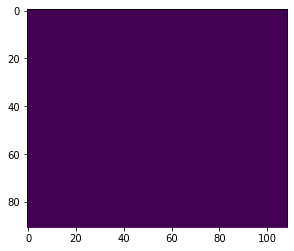

In [71]:
test_img, test_lb = next(iter(full_dataset))
print(test_img[0].shape)
plt.imshow(test_img[0])
plt.show()